In [49]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import math
import subprocess
from numpy.linalg import norm


from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as skm
from sklearn.linear_model import LinearRegression

In [50]:
def read_mot(fpath):
    with open(fpath, 'r') as f:
        # count = 0
        line = f.readline().strip()
        # while line and line.strip() != 'endheader':
        while line.lower() != 'endheader':
            line = f.readline().strip()
            # count += 1

        # df = pd.read_csv(f, delimiter='\t', header=0, skiprows=count-3)
        df = pd.read_csv(f, delimiter='\t', header=0)

    return df




In [51]:
def read_trc(fpath):
    # read metadata in file header
    df_meta = pd.read_csv(fpath, delimiter='\t', header=0, skiprows=0, nrows=1)
    meta = df_meta.iloc[0].to_dict()
    fps = meta['DataRate']

    # read marker location names
    markers_df = pd.read_csv(fpath, delimiter='\t', header=None, skiprows=2, nrows=1)
    markers = markers_df.iloc[0].dropna().to_numpy()[2:]

    # read marker XYZ locations
    df = pd.read_csv(fpath, delimiter='\t', header=0, skiprows=3)
    df.rename(columns=dict(zip(df.columns[:2], ('n', 't'))), inplace=True)
    df.dropna(how='all', axis=1, inplace=True)

    N = df.shape[0]
    M = len(markers)
    xyz = df.iloc[:,2:].to_numpy().reshape((N, M, 3))
    xyz[:,:,[0,1,2]] = xyz[:,:,[2,1,0]]

    return fps, markers, xyz

In [74]:
root_dir = '/Users/scovitz/datadir/opencap_data'
mot_df = read_mot(root_dir + "/P007/407/toe_stand/toe_stand.mot")
fps, markers, xyz = read_trc(root_dir + "/P006/0/jump/jump.trc")

In [75]:
fps

60.0

In [76]:
def trc_arm_angles(xyz, markers):
    
    # get shoulder, elbow, and wrist markers
    rs = xyz[:,np.argmax(markers=='r_shoulder_study'),:]
    ls = xyz[:,np.argmax(markers=='L_shoulder_study'),:]
    re = xyz[:,np.argmax(markers=='r_melbow_study'),:]
    le = xyz[:,np.argmax(markers=='L_melbow_study'),:]
    rw = xyz[:,np.argmax(markers=='r_mwrist_study'),:]
    lw = xyz[:,np.argmax(markers=='L_mwrist_study'),:]

    # gravity vector
    grav = np.zeros_like(rs)
    grav[:,1] = -1
    
    # print(rs, len(rs))
    #print(rw.shape)
    #print(rs.shape)


    # shoulder and elbow angles
    rsa = angle_between_all(re-rs, grav) * 180 / np.pi # to convert from radians to degrees, multiply by 180/pi
    rea = angle_between_all(rw-re, re-rs) * 180 / np.pi
    lsa = angle_between_all(le-ls, grav) * 180 / np.pi
    lea = angle_between_all(lw-le, le-ls) * 180 / np.pi

    return rsa, rea, lsa, lea

In [77]:
mot_df.columns

Index(['time', 'pelvis_tilt', 'pelvis_list', 'pelvis_rotation', 'pelvis_tx',
       'pelvis_ty', 'pelvis_tz', 'hip_flexion_r', 'hip_adduction_r',
       'hip_rotation_r', 'knee_angle_r', 'knee_angle_r_beta', 'ankle_angle_r',
       'subtalar_angle_r', 'mtp_angle_r', 'hip_flexion_l', 'hip_adduction_l',
       'hip_rotation_l', 'knee_angle_l', 'knee_angle_l_beta', 'ankle_angle_l',
       'subtalar_angle_l', 'mtp_angle_l', 'lumbar_extension', 'lumbar_bending',
       'lumbar_rotation', 'arm_flex_r', 'arm_add_r', 'arm_rot_r',
       'elbow_flex_r', 'pro_sup_r', 'arm_flex_l', 'arm_add_l', 'arm_rot_l',
       'elbow_flex_l', 'pro_sup_l'],
      dtype='object')

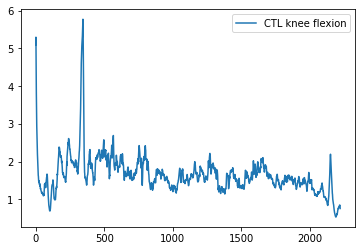

In [78]:
plt.plot(np.arange(len(mot_df['knee_angle_r'])), mot_df['knee_angle_r'], label='CTL knee flexion') 
#plt.plot(np.arange(len(fshd_mot_df['elbow_flex_r'])), fshd_mot_df['elbow_flex_r'], label='FSHD elbow flexion')
plt.legend()

In [ ]:
for 